In [215]:
import numpy as np
import pandas as pd
import scipy.io
from matplotlib import pyplot as plt
import seaborn
import math

from os import listdir
from os.path import dirname, join

In [167]:
# fill the corresponding weight of a failing order by zero
def fill_missing_with_zero(reg_orders_and_weights):
    order_to_index = {(1,0,0):0, (1,0,1):1, (1,0,2):2, (1,0,3):3, (1,0,4):4, (1,0,5):5,
                      (2,0,0):6, (2,0,1):7, (2,0,2):8, (2,0,3):9, (2,0,4):10,(2,0,5):11,
                      (3,0,0):12,(3,0,1):13,(3,0,2):14,(3,0,3):15,(3,0,4):16,(3,0,5):17,
                      (4,0,0):18,(4,0,1):19,(4,0,2):20,(4,0,3):21,(4,0,4):22,(4,0,5):23,
                      (5,0,0):24,(5,0,1):25,(5,0,2):26,(5,0,3):27,(5,0,4):28,(5,0,5):29}
    
    # the orders are stored as a nested list of either list of ndarray, we need to make them all into nested lists
    reg_orders = reg_orders_and_weights[0]
    tmp = []
    for order in reg_orders:
        if isinstance(order[0],np.int64):
            tmp.append(tuple(order))
        else:
            tmp.append(tuple(order[0]))
    reg_orders =tmp
    
    # the weights are stored as a nested list of either list of ndarray, we need to make them all into nested lists
    reg_weights = reg_orders_and_weights[1]
    if len(reg_weights)==1:
        reg_weights = reg_weights.tolist()[0]
    else:
        reg_weights = reg_weights.tolist()
    
    # filling up the missing orders and make the corresponding weights zero
    for order in order_to_index:
        if not order in reg_orders:
            reg_weights.insert(order_to_index[order],0)
            reg_orders.insert(order_to_index[order],order)
    
    return reg_orders,reg_weights

In [219]:
# making correspondence between a certain row to a subject ID (this is for potential later usage)
# row_num_to_subID[r] stores the ID of the subject whose data is stored in row r
row_to_subID = {}

In [220]:
file_dir = 'E:/projects/connectome/results/HurstExp_ARMA_results_0_to_5/ensemble_orders_and_weights'
file_names = listdir(file_dir)

all_orders = []
all_weights = []

for i,file_name in enumerate(file_names):
    ID_num = file_name[-10:-4]
    subject_ID = 'sub'+ID_num
    
    # putting row num into 1-to-1 correspondence to subject ID
    row_to_subID[i]=ID_num
    
    
    file = join(file_dir,file_name)
    sub_orders_and_weights = scipy.io.loadmat(file)['ensemble_orders_and_weights']
    
    sub_orders = []
    sub_weights = []
    
    for reg in range(160):
        reg_orders, reg_weights = fill_missing_with_zero(sub_orders_and_weights[reg])
        sub_orders.append(reg_orders)
        sub_weights.append(reg_weights)
    
    all_orders.append(sub_orders)
    all_weights.append(sub_weights)

#### Make sure that we have filled up all missing models and weights, the following loop would print if there is still a missing value

In [172]:
for sub in range(len(all_weights)):
    for reg in range(len(all_weights[0])):
        if len(all_orders[sub][reg])<30:
            print('{},{}:{}'.format(sub,reg,len(all_orders[sub][reg])))

# Heat map of model orders with highest predicting power (AIC)

## Summing p and q

#### Here we look at the sum of p and q of the model with the highest AIC in each region and subject

In [179]:
order_sum_of_best_model = []

In [180]:
for sub in range(len(all_weights)):
    tmp = []
    for reg in range(len(all_weights[0])):
        max_weight = max(all_weights[sub][reg])
        max_weight_index = all_weights[sub][reg].index(max_weight)
        tmp.append(sum(all_orders[sub][reg][max_weight_index]))
    order_sum_of_best_model.append(tmp)

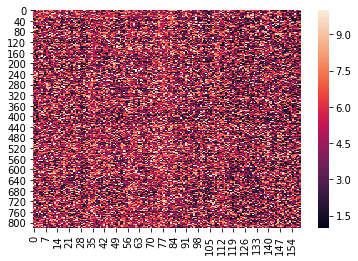

In [181]:
seaborn.heatmap(order_sum_of_best_model)
plt.show()

## Looking at just p

In [182]:
p_of_best_model = []

In [183]:
for sub in range(len(all_weights)):
    tmp = []
    for reg in range(len(all_weights[0])):
        max_weight = max(all_weights[sub][reg])
        max_weight_index = all_weights[sub][reg].index(max_weight)
        tmp.append(all_orders[sub][reg][max_weight_index][0])
    p_of_best_model.append(tmp)

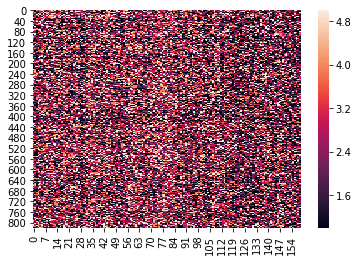

In [184]:
seaborn.heatmap(p_of_best_model)
plt.show()

## Looking at just q

In [185]:
q_of_best_model = []

In [186]:
for sub in range(len(all_weights)):
    tmp = []
    for reg in range(len(all_weights[0])):
        max_weight = max(all_weights[sub][reg])
        max_weight_index = all_weights[sub][reg].index(max_weight)
        tmp.append(all_orders[sub][reg][max_weight_index][2])
    q_of_best_model.append(tmp)

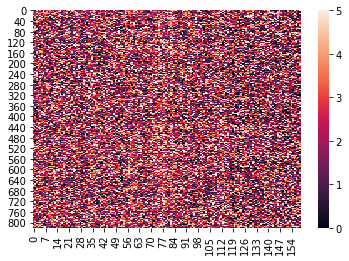

In [187]:
seaborn.heatmap(q_of_best_model)
plt.show()

In [188]:
all_weights[819][]

[[array([[1.6056507e-06]]),
  array([[0.1420736]]),
  array([[0.09765699]]),
  array([[0.04691481]]),
  array([[0.03022889]]),
  array([[0.01162848]]),
  array([[0.06102545]]),
  array([[0.09105798]]),
  array([[0.06026227]]),
  array([[0.02317181]]),
  array([[0.00575006]]),
  array([[0.00945704]]),
  array([[0.09506884]]),
  array([[0.03768636]]),
  array([[0.04560948]]),
  array([[0.00844332]]),
  array([[0.00860949]]),
  array([[0.00349144]]),
  array([[0.0421365]]),
  array([[0.0486525]]),
  array([[0.01933407]]),
  array([[0.00461043]]),
  array([[0.02988397]]),
  array([[0.00245847]]),
  array([[0.03263357]]),
  array([[0.01305012]]),
  array([[0.02225448]]),
  array([[0.00537163]]),
  array([[0.0008013]]),
  array([[0.00067502]])],
 [array([[3.18236609e-06]]),
  array([[0.16673803]]),
  array([[0.0863156]]),
  array([[0.038642]]),
  array([[0.03331275]]),
  array([[0.01244207]]),
  array([[0.00258946]]),
  array([[0.08431756]]),
  array([[0.03258515]]),
  array([[0.01764473]]),

## Subject versus Model

In [194]:
len(list(all_weights[800][i][0] for i in range(160)))

160

#### Here we sum up the weights of a certain model across all regions for each subject. This is to see if certain model has higher overall weights than other regions across subjects.

In [212]:
sub_vs_model = []

for sub in range(820):
    weight_sums_for_models = []
    for model in range(30):
        # summing weights of the sme model across all region
        weight_sum_across_reg = sum(list(all_weights[sub][i][model] for i in range(160)))  
        weight_sums_for_models.append(weight_sum_across_reg)
    sub_vs_model.append(weight_sums_for_models)
    
# fix the type issues again in order to be able to plot the heat map 
# here we are making sure that each entry in sub_vs_model is of type "float" instead of type "array([numpy.float64])"
for sub in range(820):
    for model in range(30): 
        if not isinstance(sub_vs_model[sub][model],float):
            sub_vs_model[sub][model] = float(sub_vs_model[sub][model][0][0])

In [229]:
sub_vs_model = pd.DataFrame(sub_vs_model)

order_to_index = {(1,0,0):0, (1,0,1):1, (1,0,2):2, (1,0,3):3, (1,0,4):4, (1,0,5):5,
                      (2,0,0):6, (2,0,1):7, (2,0,2):8, (2,0,3):9, (2,0,4):10,(2,0,5):11,
                      (3,0,0):12,(3,0,1):13,(3,0,2):14,(3,0,3):15,(3,0,4):16,(3,0,5):17,
                      (4,0,0):18,(4,0,1):19,(4,0,2):20,(4,0,3):21,(4,0,4):22,(4,0,5):23,
                      (5,0,0):24,(5,0,1):25,(5,0,2):26,(5,0,3):27,(5,0,4):28,(5,0,5):29}

model_col_names = [model for model in order_to_index]
sub_vs_model.columns= model_col_names

[]

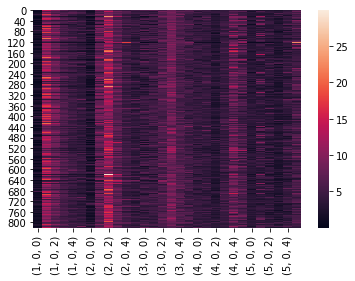

In [225]:
seaborn.heatmap(sub_vs_model)
plt.plot()

## Region versus Model

In [222]:
reg_vs_model = []

for reg in range(160):
    weight_sums_for_models = []
    for model in range(30):
        # summing weights of the same model across all subjects
        weight_sum_across_sub = sum(list(all_weights[i][reg][model] for i in range(820)))  
        weight_sums_for_models.append(weight_sum_across_sub)
    reg_vs_model.append(weight_sums_for_models)
    
# fix the type issues again in order to be able to plot the heat map 
# here we are making sure that each entry in sub_vs_model is of type "float" instead of type "array([numpy.float64])"
for reg in range(160):
    for model in range(30): 
        if not isinstance(reg_vs_model[reg][model],float):
            reg_vs_model[reg][model] = float(reg_vs_model[reg][model][0][0])

[]

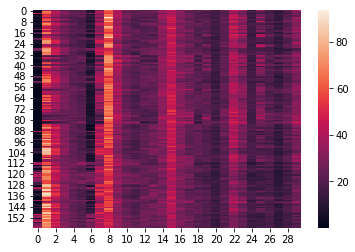

In [226]:
seaborn.heatmap(reg_vs_model)
plt.plot()

## Weight Heatmap for each model

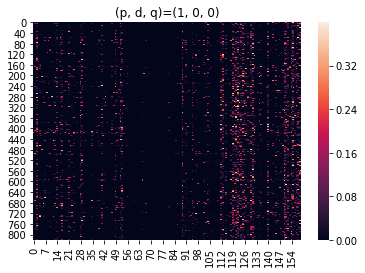

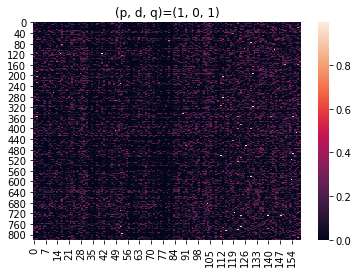

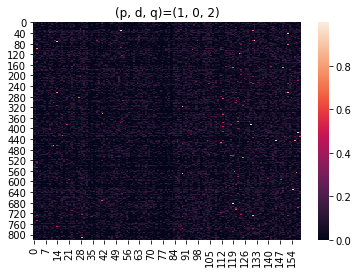

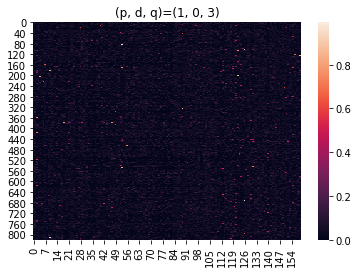

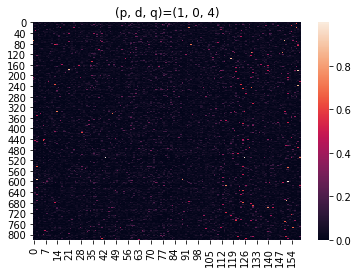

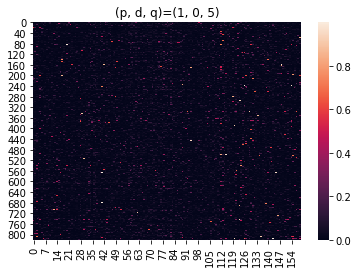

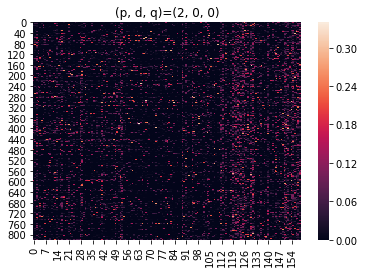

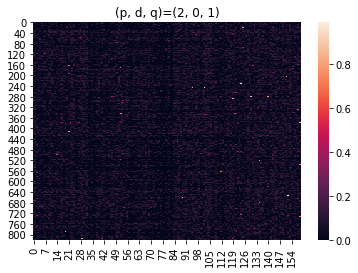

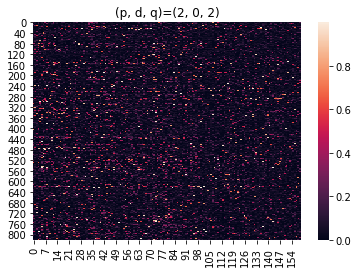

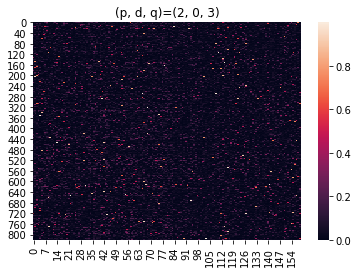

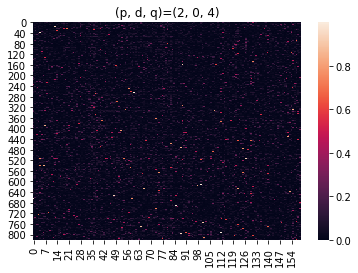

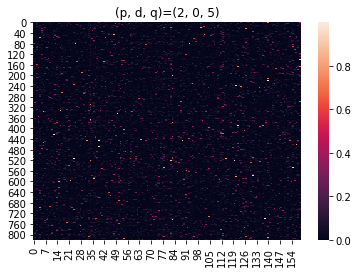

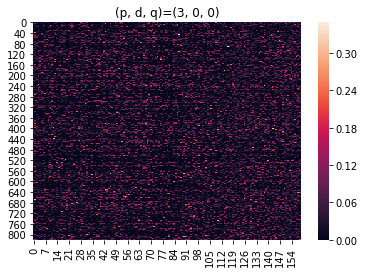

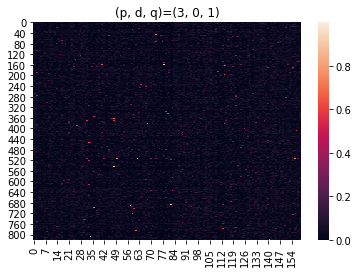

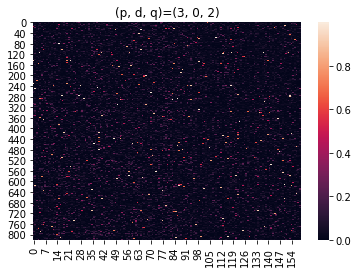

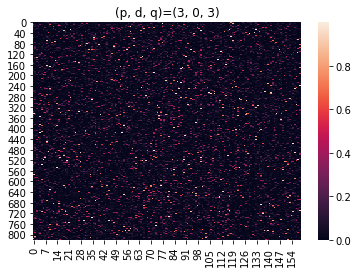

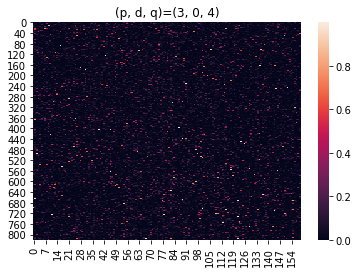

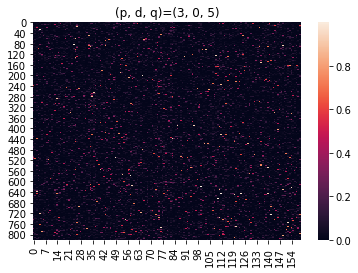

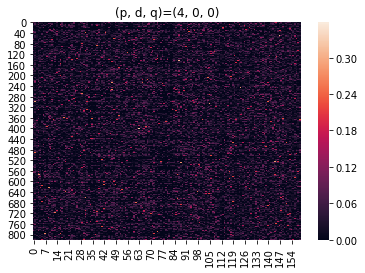

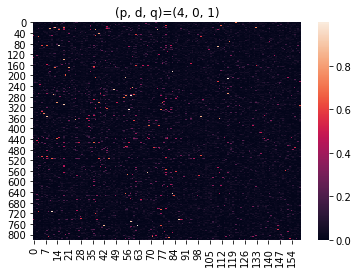

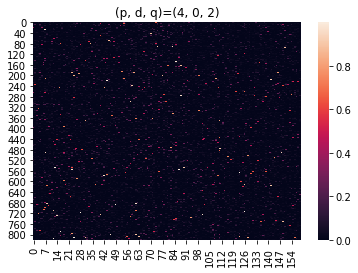

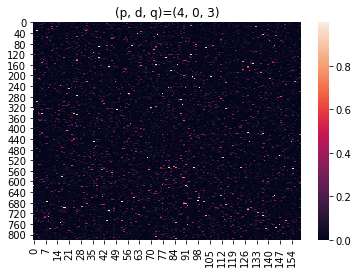

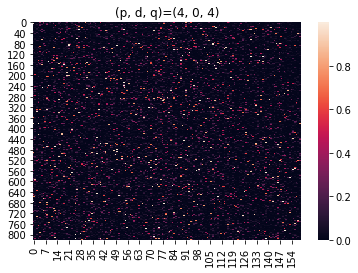

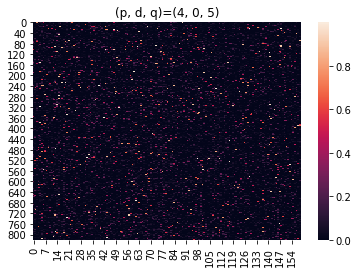

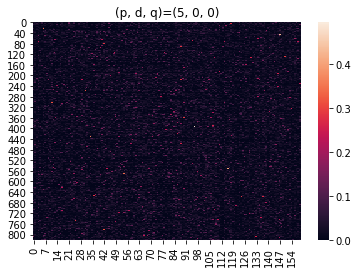

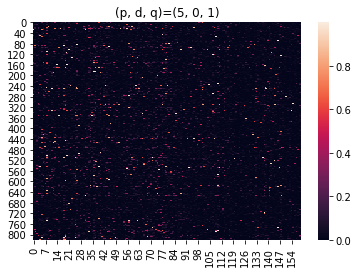

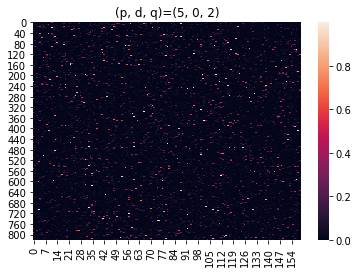

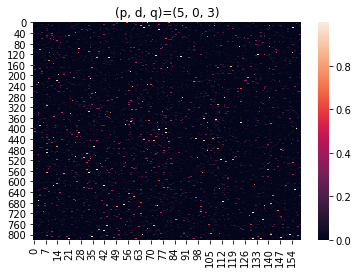

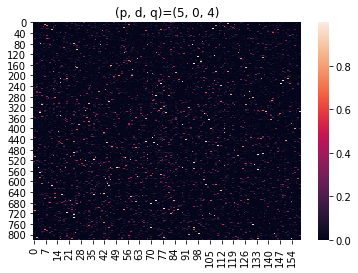

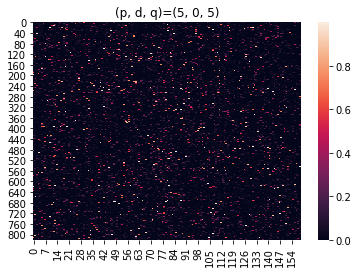

In [239]:
for model in range(30):
    model_weights_matrix = []
    for sub in range(820):
        sub_weight_of_regions = [all_weights[sub][i][model] for i in range(160)]
        model_weights_matrix.append(sub_weight_of_regions)
    
    for sub in range(820):
        for reg in range(160): 
            if not isinstance(model_weights_matrix[sub][reg],float) and not isinstance(model_weights_matrix[sub][reg],int):
                model_weights_matrix[sub][reg] = float(model_weights_matrix[sub][reg][0][0])    
    
    seaborn.heatmap(model_weights_matrix)
    plt.title('(p, d, q)='+str(model_col_names[model]))
    plt.show()
            